In [1]:
import pandas as pd
import nltk
from libs.cleaning import *
from matplotlib import pyplot as plt

# Lectura

In [2]:
tweets = pd.read_excel("../data/New tweet from search (55).xlsx", header=None)
tweets.columns = ['User', 'Tweet', 'Link', 'Date']
tweets.head()

,User,Tweet,Link,Date
0,@germy666,RT @GildoGarzaMx: #México El youtuber @fercarm...,https://twitter.com/germy666/status/1806107070...,"June 26, 2024 at 05:27PM"
1,@No_your_friend,RT @GildoGarzaMx: #México El youtuber @fercarm...,https://twitter.com/No_your_friend/status/1806...,"June 26, 2024 at 05:28PM"
2,@Karenka77_,RT @GildoGarzaMx: #México El youtuber @fercarm...,https://twitter.com/Karenka77_/status/18061074...,"June 26, 2024 at 05:29PM"
3,@cabe_lorena,RT @SirHijoDPuta: @GildoGarzaMx @ariadnahgg @f...,https://twitter.com/cabe_lorena/status/1806108...,"June 26, 2024 at 05:32PM"
4,@cabe_lorena,RT @SKY_M4X: @GildoGarzaMx @fercarmona18 @junc...,https://twitter.com/cabe_lorena/status/1806108...,"June 26, 2024 at 05:32PM"


# Limpieza

In [3]:
tweets["RT"] = tweets["Tweet"].apply(lambda x: 1 if x.startswith("RT") else 0)
tweets.head()

,User,Tweet,Link,Date,RT
0,@germy666,RT @GildoGarzaMx: #México El youtuber @fercarm...,https://twitter.com/germy666/status/1806107070...,"June 26, 2024 at 05:27PM",1
1,@No_your_friend,RT @GildoGarzaMx: #México El youtuber @fercarm...,https://twitter.com/No_your_friend/status/1806...,"June 26, 2024 at 05:28PM",1
2,@Karenka77_,RT @GildoGarzaMx: #México El youtuber @fercarm...,https://twitter.com/Karenka77_/status/18061074...,"June 26, 2024 at 05:29PM",1
3,@cabe_lorena,RT @SirHijoDPuta: @GildoGarzaMx @ariadnahgg @f...,https://twitter.com/cabe_lorena/status/1806108...,"June 26, 2024 at 05:32PM",1
4,@cabe_lorena,RT @SKY_M4X: @GildoGarzaMx @fercarmona18 @junc...,https://twitter.com/cabe_lorena/status/1806108...,"June 26, 2024 at 05:32PM",1


In [4]:
tweets["Cleaned"] = limpieza_total(tweets["Tweet"])

In [34]:
tweets[tweets["RT"]==0]["Cleaned"].values[5]

'movistarmx disque servicio pesimo pesimo atencionprofeco profeco ift_mx'

# Análisis

In [5]:
print("Total de tweets: ", len(tweets))
print("Total de RTs: ", tweets["RT"].sum())

Total de tweets:  2000
Total de RTs:  1399


In [24]:
# Top 20 palabras más comunes
top_words = pd.Series(count_words(tweets.Cleaned.str.split())).sort_values(ascending=False)
top_words_nort = pd.Series(count_words(tweets[tweets.RT != 1].Cleaned.str.split())).sort_values(ascending=False)

top_words_per = top_words / top_words.sum()
top_words_nort_per = top_words_nort / top_words_nort.sum()

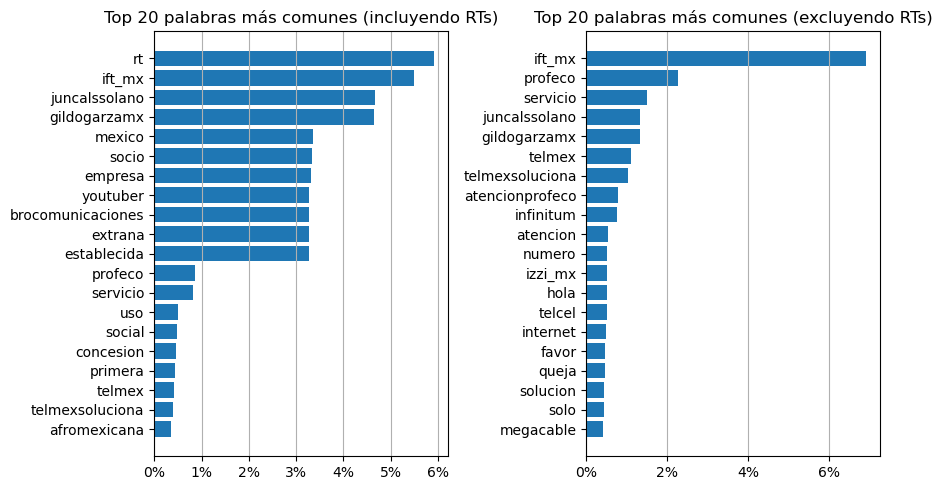

In [26]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores como porcentaje
formatter = FuncFormatter(lambda x, pos: f'{x:.0%}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la primera gráfica
axes[0].barh(top_words_per.index[:20], top_words_per.values[:20])
axes[0].set_title("Top 20 palabras más comunes (incluyendo RTs)")
axes[0].invert_yaxis()  # Voltear en espejo
axes[0].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

axes[1].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la segunda gráfica
axes[1].barh(top_words_nort_per.index[:20][::-1], top_words_nort_per.values[:20][::-1])
axes[1].set_title("Top 20 palabras más comunes (excluyendo RTs)")
axes[1].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

plt.tight_layout()
plt.show()